In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("DS2_C5_S3_HR_Data_Practice.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# 1.Data Exploration and Visualization.

# a.Visualize the impact of salary on employee retention.

<Figure size 1000x400 with 0 Axes>

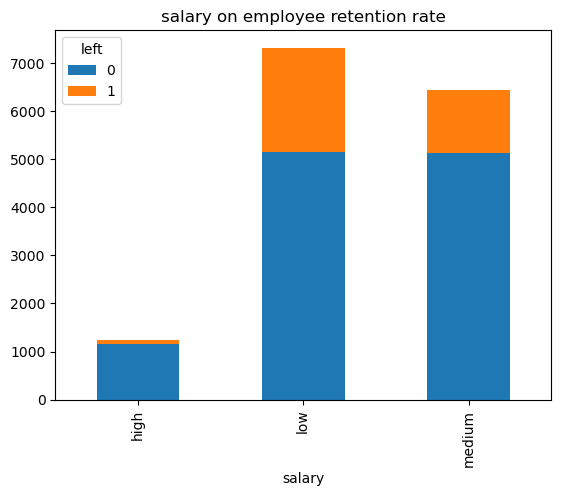

In [5]:
plt.figure(figsize=(10,4))
pd.crosstab(df['salary'],df['left']).plot(kind='bar',stacked=True)
plt.title('salary on employee retention rate');

# b.Identify the department-wise employee retention rate the dataset.

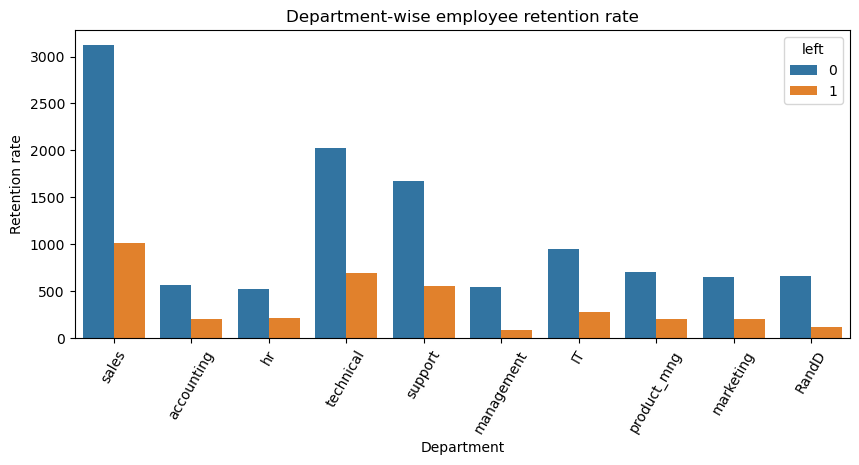

In [6]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Department'],hue=df['left'])
plt.title('Department-wise employee retention rate')
plt.xlabel('Department')
plt.ylabel('Retention rate')
plt.xticks(rotation=60);

# 2.Data Preprocessing.

# a.Identify if any missing values.

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# b.Identify correleation among variables.

In [8]:
df.corr().T

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


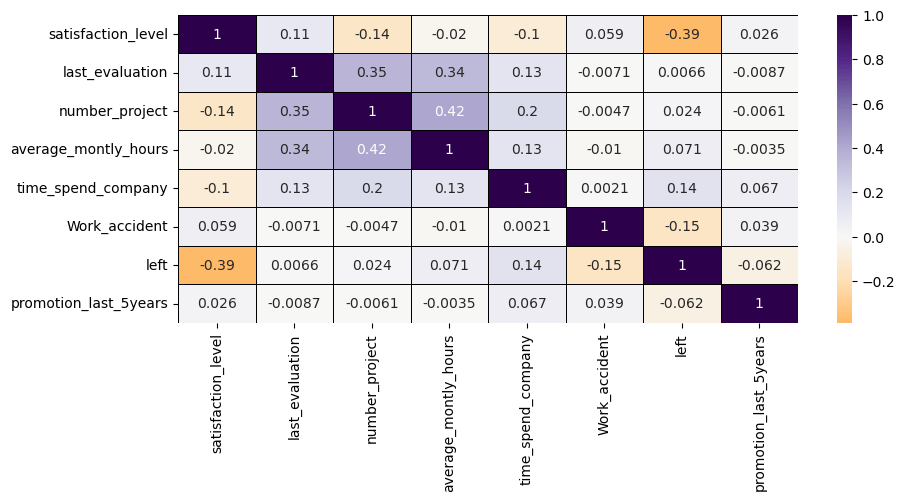

In [9]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='k',linewidth=.5,cmap='PuOr',center=0);

# c.Perform data preparation: Salary and department have all text data. Convert them to numbers.

In [10]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['salary']=a.fit_transform(df['salary'])
df['Department']=a.fit_transform(df['Department'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


# d.Excluded the variables, 'left' and 'salary',(category) from the dataset.

In [11]:
x=df.drop(columns=['left','salary'],axis=1)
y=df['salary']

# Which parameters have to be excluded in our analysis beacuse they corrleate with the 'left variables?'

#Satisfication_level parameter have to be excluded in our analysis beacuse they corrleate with the 'left variables.

# 3.Modelling-Decision Tree.

# a.Apply data splitting into train and test.

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [47]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=4,max_leaf_nodes=20)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=20)

# b.Apply Train Decision Tree Regression and predict the outcomes for test data.

In [41]:
y_pred=model.predict(x_test)
y_pred

array([1.36622391, 1.30259067, 1.36622391, ..., 1.34879594, 1.34879594,
       1.30259067])

# c.Calculate the accuracy of the training dtaset.

In [45]:
model.score(x_train,y_train)

0.9991212568727074

# c.Calculate the accuracy of the model on the test dataset.

In [48]:
model.fit(x_test,y_test)
model.score(x_train,y_train)

3.279649851539723e-05

# Use a decision tree to predict the dsalary of a person.

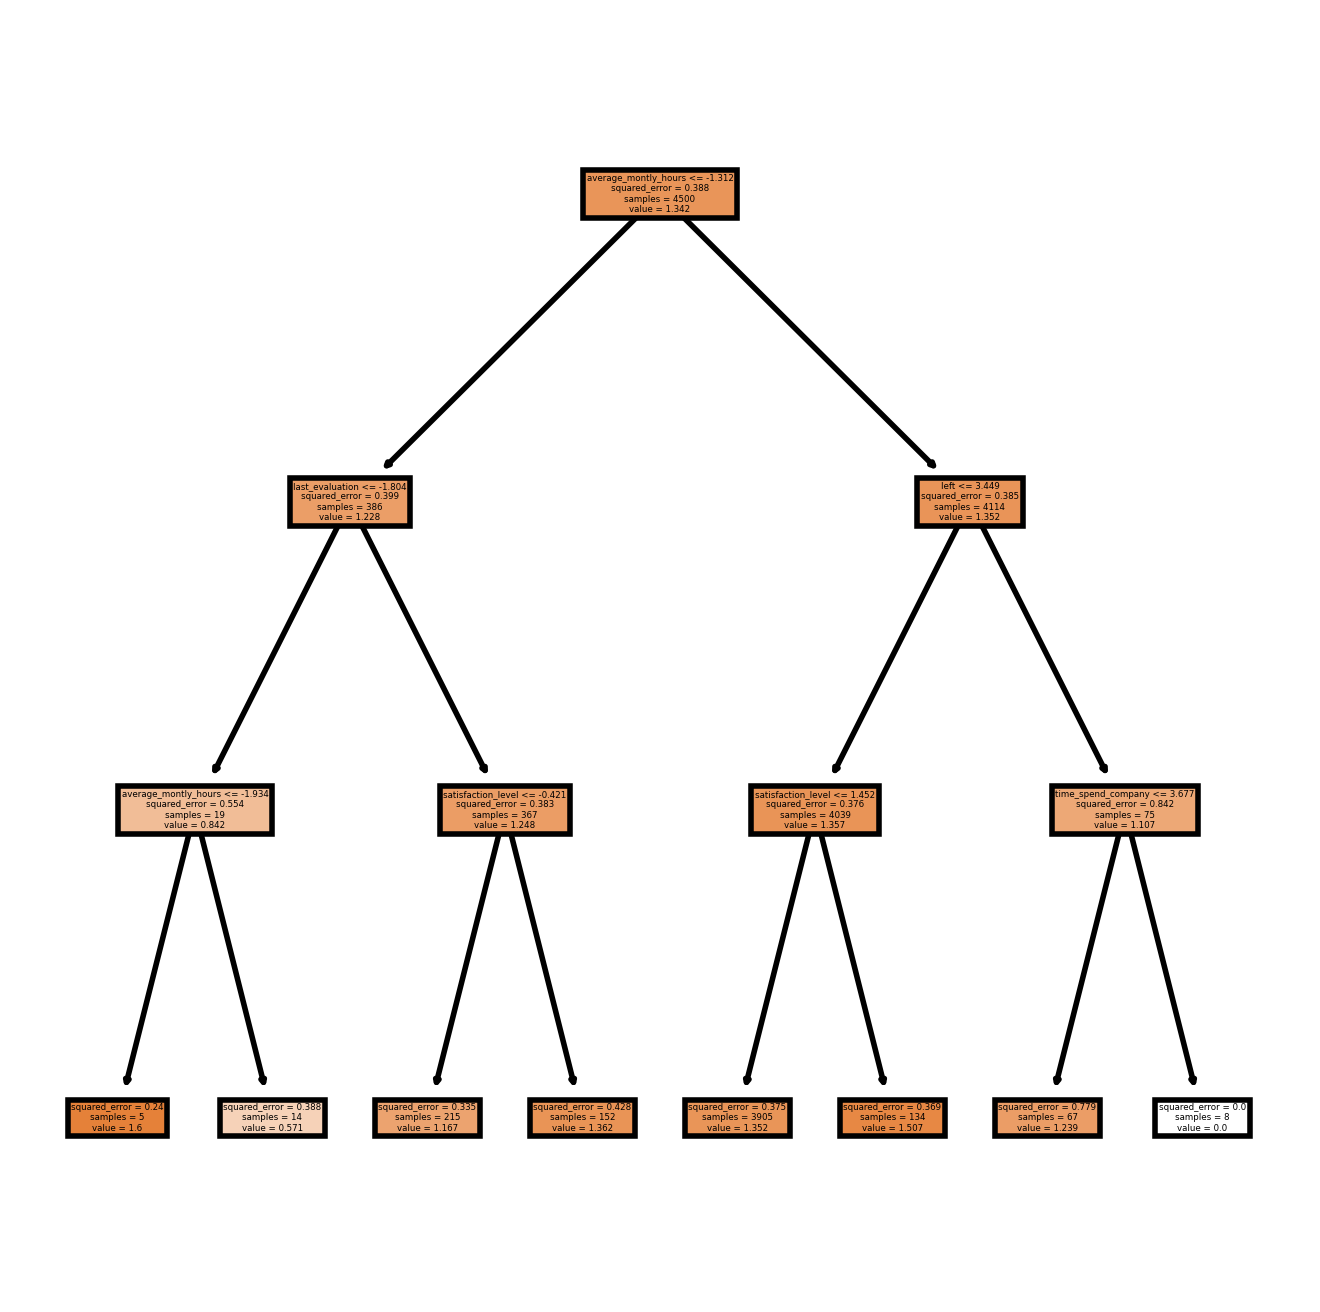

In [172]:
from sklearn import tree
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=400)
tree.plot_tree(model,feature_names=df.columns,filled=True)
fig.savefig('HR_tree.png')